In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

%config InlineBackend.rc = {'figure.figsize': (6, 6)}
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Student Mental health.csv")

In [3]:
df.shape

(101, 11)

In [4]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic_education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [6]:
new_columns = ['Time','Gender','Age','Course','Year','CGPA','Marriage','Depression','Anxiety','Panic','Treatment']
df.columns=new_columns

In [7]:
df.head()

,Time,Gender,Age,Course,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic_education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [8]:
df.isnull().sum()

Time          0
Gender        0
Age           1
Course        0
Year          0
CGPA          0
Marriage      0
Depression    0
Anxiety       0
Panic         0
Treatment     0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Time          0
Gender        0
Age           0
Course        0
Year          0
CGPA          0
Marriage      0
Depression    0
Anxiety       0
Panic         0
Treatment     0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        100 non-null    object 
 1   Gender      100 non-null    object 
 2   Age         100 non-null    float64
 3   Course      100 non-null    object 
 4   Year        100 non-null    object 
 5   CGPA        100 non-null    object 
 6   Marriage    100 non-null    object 
 7   Depression  100 non-null    object 
 8   Anxiety     100 non-null    object 
 9   Panic       100 non-null    object 
 10  Treatment   100 non-null    object 
dtypes: float64(1), object(10)
memory usage: 9.4+ KB


In [13]:
new = df['Year'].str.split(' ',n=1,expand=True)
df['X'] = new[0]
df['Y'] = new[1]
df["Year"]=df['Y']
df=df.drop(columns=['X', 'Y'])

In [14]:
df.Year.unique()

array(['1', '2', '3', '4'], dtype=object)

In [15]:
df.head()

,Time,Gender,Age,Course,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic_education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


In [16]:
df.CGPA.unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [17]:
df["CGPA"]=df["CGPA"].str.strip(" ")

In [18]:
df.CGPA.unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [19]:
df.CGPA.unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [20]:
df['Age'] = df['Age'].astype(int)

In [21]:
df.head()

,Time,Gender,Age,Course,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21,Islamic_education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


In [22]:
df.drop("Time",axis=1,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      100 non-null    object
 1   Age         100 non-null    int32 
 2   Course      100 non-null    object
 3   Year        100 non-null    object
 4   CGPA        100 non-null    object
 5   Marriage    100 non-null    object
 6   Depression  100 non-null    object
 7   Anxiety     100 non-null    object
 8   Panic       100 non-null    object
 9   Treatment   100 non-null    object
dtypes: int32(1), object(9)
memory usage: 8.2+ KB


In [24]:
df['Year'] = df['Year'].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      100 non-null    object
 1   Age         100 non-null    int32 
 2   Course      100 non-null    object
 3   Year        100 non-null    int32 
 4   CGPA        100 non-null    object
 5   Marriage    100 non-null    object
 6   Depression  100 non-null    object
 7   Anxiety     100 non-null    object
 8   Panic       100 non-null    object
 9   Treatment   100 non-null    object
dtypes: int32(2), object(8)
memory usage: 7.8+ KB


In [26]:
df.head()

,Gender,Age,Course,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,Female,18,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21,Islamic_education,2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


In [27]:
df.Age.unique()

array([18, 21, 19, 22, 23, 20, 24])

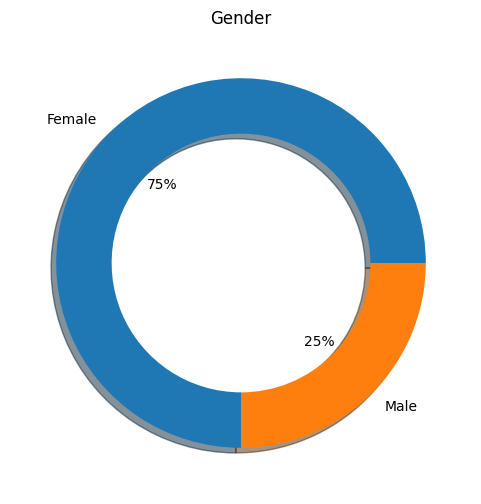

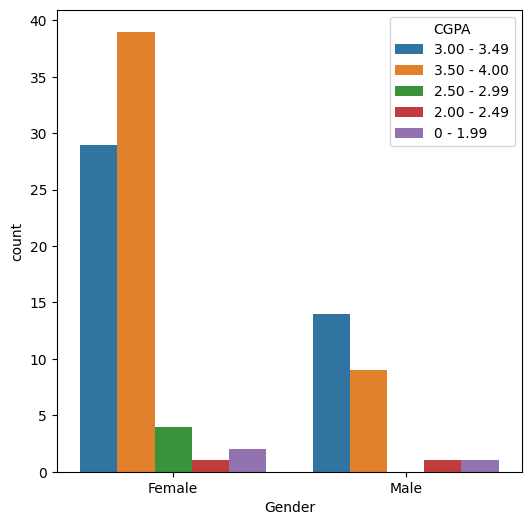

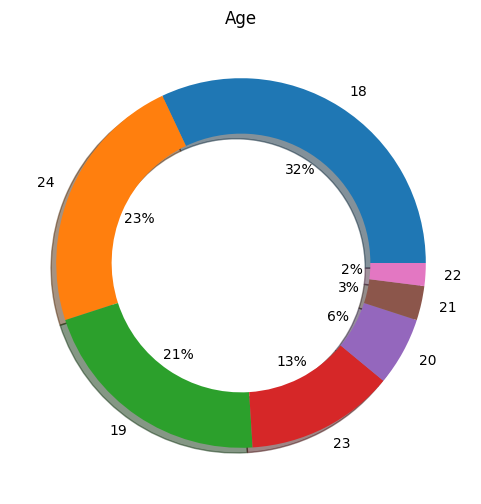

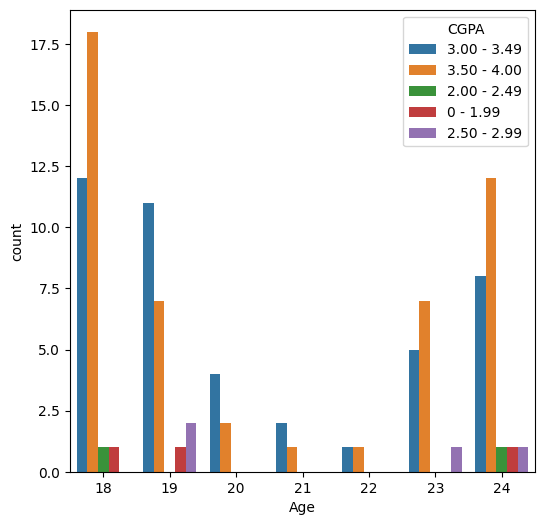

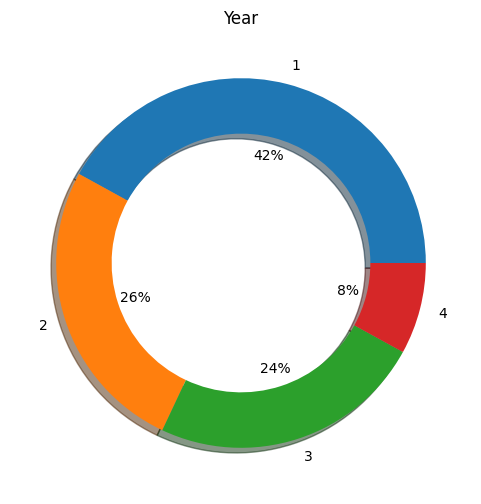

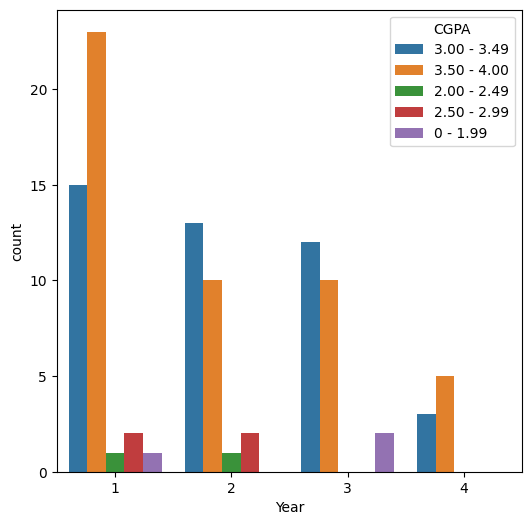

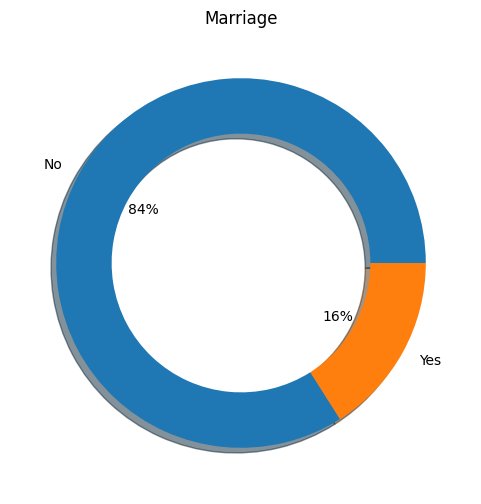

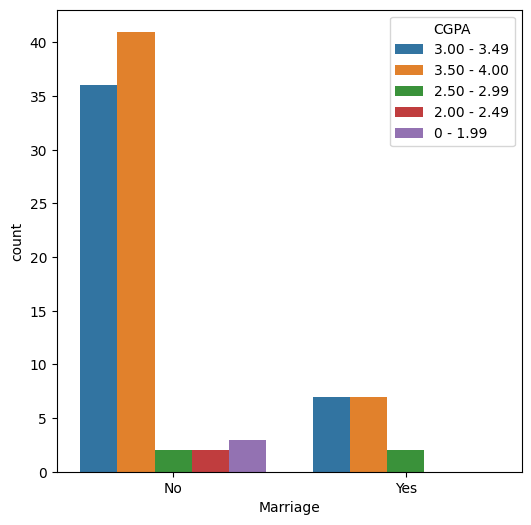

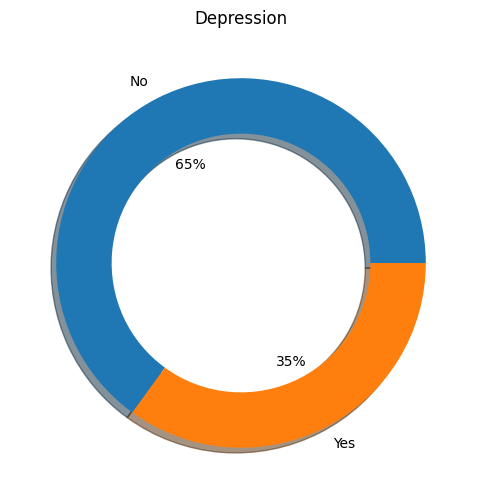

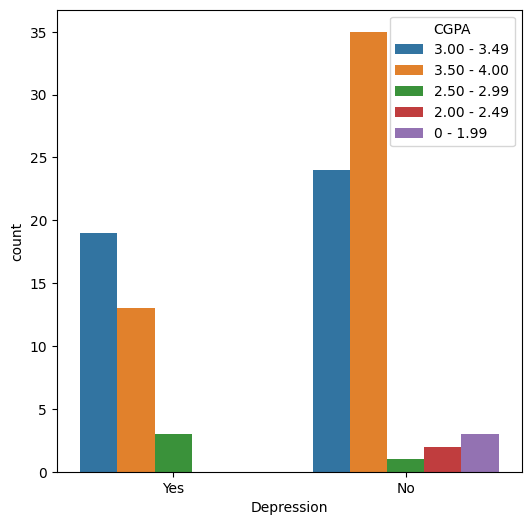

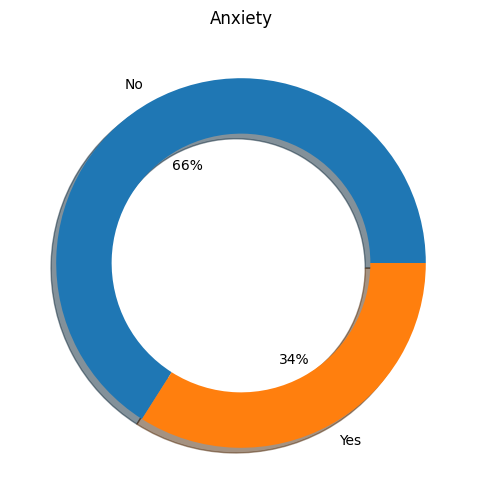

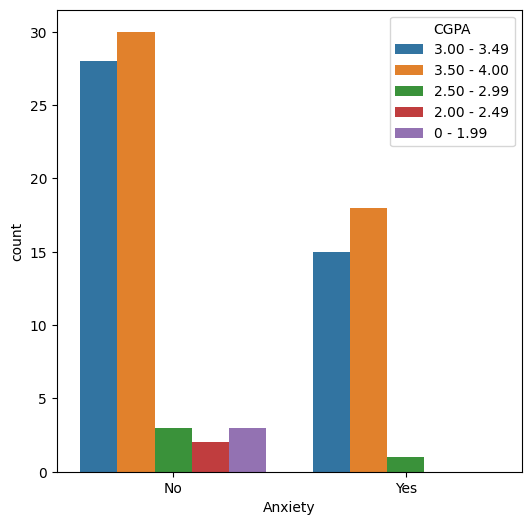

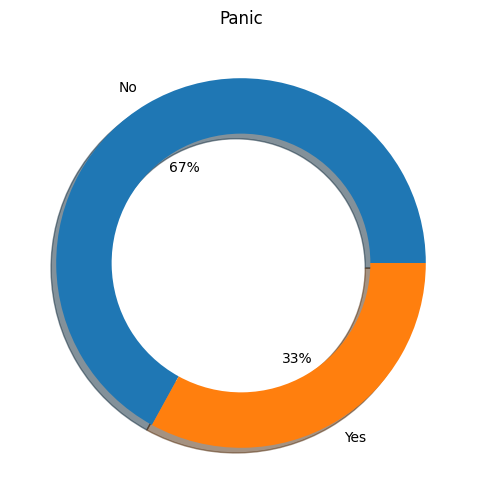

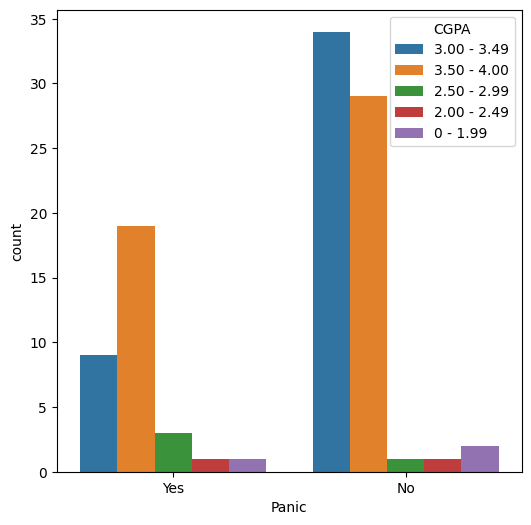

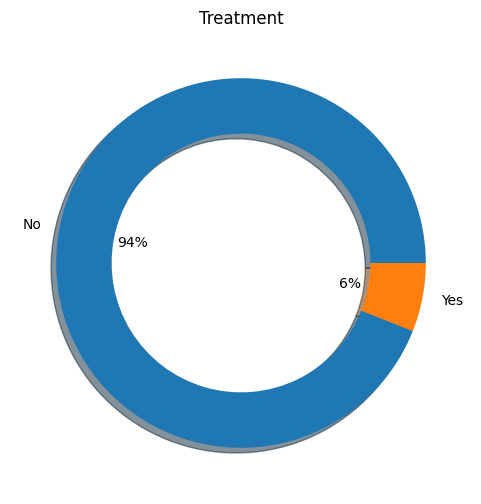

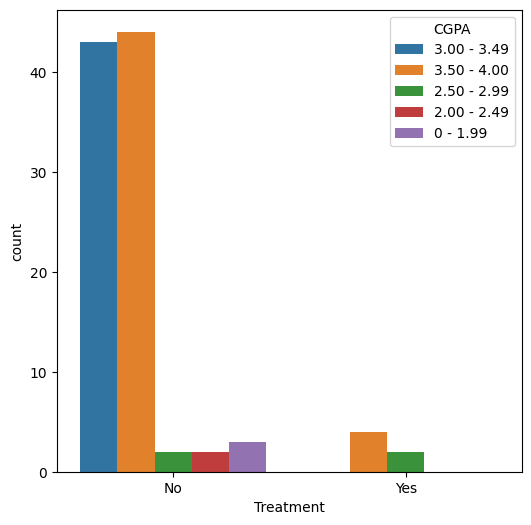

In [28]:
for i in ['Gender','Age','Year','Marriage','Depression','Anxiety','Panic','Treatment']:
    data = df[i].value_counts()
    plt.pie(data, labels=data.index,autopct='%.0f%%',shadow=True,wedgeprops={"width":0.3})
    plt.title(i)
    plt.show()
    sns.countplot(df, x=i, hue="CGPA")
    plt.show()

In [29]:
df.replace("0 - 1.99", "0",inplace=True)
df.replace('2.00 - 2.49', "1",inplace=True)
df.replace('2.50 - 2.99', "2",inplace=True)
df.replace('3.50 - 4.00', "3",inplace=True)
df.replace('3.00 - 3.49', "4",inplace=True)
df['CGPA'] = df['CGPA'].astype('category')

In [30]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Female' else 1)
df['Gender'] = df['Gender'].astype('category')

In [31]:
for column in ['Marriage','Depression','Anxiety','Panic','Treatment']:
    df[column] = df[column].apply(lambda x: 0 if x == 'No' else 1)
    df[column] = df[column].astype('category')

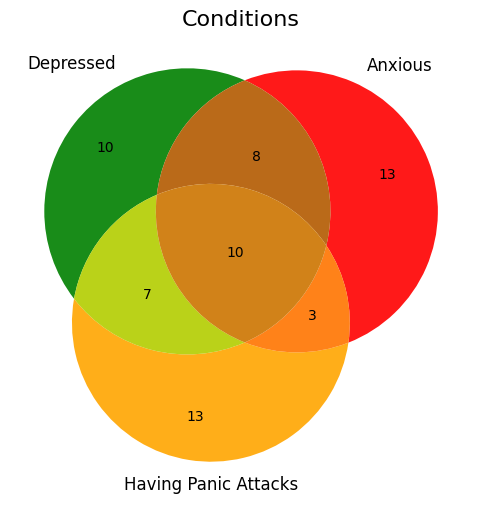

In [53]:
from matplotlib_venn import venn3
depressed = df[(df["Depression"] == 1)]
anxious = df[(df["Anxiety"] == 1)]
panicking = df[(df["Panic"] == 1)]

venn3(subsets = [set(depressed.index), 
                 set(anxious.index), 
                 set(panicking.index)], 
      set_labels = ("Depressed", "Anxious", "Having Panic Attacks"),
      set_colors = ("Green", "Red", "Orange"),
      alpha = 0.9)

plt.title("Conditions", fontsize = 16)
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Gender      100 non-null    category
 1   Age         100 non-null    int32   
 2   Course      100 non-null    object  
 3   Year        100 non-null    int32   
 4   CGPA        100 non-null    category
 5   Marriage    100 non-null    category
 6   Depression  100 non-null    category
 7   Anxiety     100 non-null    category
 8   Panic       100 non-null    category
 9   Treatment   100 non-null    category
dtypes: category(7), int32(2), object(1)
memory usage: 4.0+ KB


In [34]:
df.head()

,Gender,Age,Course,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,0,18,Engineering,1,4,0,1,0,1,0
1,1,21,Islamic_education,2,4,0,0,1,0,0
2,1,19,BIT,1,4,0,1,1,1,0
3,0,22,Laws,3,4,1,1,0,0,0
4,1,23,Mathemathics,4,4,0,0,0,0,0


In [35]:
df = pd.get_dummies(df, columns=['Course'])

In [36]:
df.shape

(100, 58)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          100 non-null    category
 1   Age                             100 non-null    int32   
 2   Year                            100 non-null    int32   
 3   CGPA                            100 non-null    category
 4   Marriage                        100 non-null    category
 5   Depression                      100 non-null    category
 6   Anxiety                         100 non-null    category
 7   Panic                           100 non-null    category
 8   Treatment                       100 non-null    category
 9   Course_ALA                      100 non-null    bool    
 10  Course_Accounting               100 non-null    bool    
 11  Course_BCS                      100 non-null    bool    
 12  Course_BENL                

In [38]:
for i in df.iloc[:,9:]:
    df[i]=df[i].astype(int).astype("category")

In [39]:
df

,Gender,Age,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment,Course_ALA,...,Course_Nursing,Course_Pendidikan islam,Course_Pendidikan_Islam,Course_Psychology,Course_Radiography,Course_TAASL,Course_Usuluddin,Course_engin,Course_koe,Course_psychology
0,0,18,1,4,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,21,2,4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,19,1,4,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,22,3,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,23,4,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,21,1,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,1,18,2,4,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,19,3,3,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
99,0,23,4,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          100 non-null    category
 1   Age                             100 non-null    int32   
 2   Year                            100 non-null    int32   
 3   CGPA                            100 non-null    category
 4   Marriage                        100 non-null    category
 5   Depression                      100 non-null    category
 6   Anxiety                         100 non-null    category
 7   Panic                           100 non-null    category
 8   Treatment                       100 non-null    category
 9   Course_ALA                      100 non-null    category
 10  Course_Accounting               100 non-null    category
 11  Course_BCS                      100 non-null    category
 12  Course_BENL                

In [41]:
from sklearn.model_selection import train_test_split
X = df.drop(["Depression"],axis=1)
y= df["Depression"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state =15)

In [42]:
"""from sklearn.ensemble import RandomForestClassifier
import lightgbm as ltb
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

RF = RandomForestClassifier()
RF.fit(X_train, y_train)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 7, 10, 13, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

grid_search = GridSearchCV(RF, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

ypred = best_rf.predict(X_test)

cm = confusion_matrix(y_test, ypred)
accuracy = accuracy_score(y_test, ypred)
f1_macro = f1_score(y_test, ypred, average='macro')

print("Confusion Matrix:", cm)
print("Accuracy Score:", accuracy)
print("F1-Score:", f1_macro)
"""

'from sklearn.ensemble import RandomForestClassifier\nimport lightgbm as ltb\nfrom sklearn import tree\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import confusion_matrix, accuracy_score, f1_score\n\nRF = RandomForestClassifier()\nRF.fit(X_train, y_train)\n\nparam_grid = {\n    \'n_estimators\': [100, 200, 300, 400, 500],\n    \'max_depth\': [5, 7, 10, 13, 15],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\'],\n}\n\ngrid_search = GridSearchCV(RF, param_grid, cv=5, n_jobs=-1, scoring=\'accuracy\')\ngrid_search.fit(X_train, y_train)\n\nbest_params = grid_search.best_params_\nprint("Best Hyperparameters:", best_params)\n\nbest_rf = RandomForestClassifier(**best_params)\nbest_rf.fit(X_train, y_train)\n\nypred = best_rf.predict(X_test)\n\ncm = confusion_matrix(y_test, ypred)\naccuracy = accuracy_score(y_test, ypred)\nf1_macro = f1_score(y_test, ypred, average=\'macro\')\n\nprint("C

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

RF = RandomForestClassifier(
    max_depth=13,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=500
)

RF.fit(X_train, y_train)
ypred = RF.predict(X_test)

cm = confusion_matrix(y_test, ypred)
accuracy = accuracy_score(y_test, ypred)
f1_macro = f1_score(y_test, ypred, average='macro')

print("Confusion Matrix:", cm)
print("Accuracy Score:", accuracy)
print("F1-Score:", f1_macro)

Confusion Matrix: [[16  0]
 [ 1  3]]
Accuracy Score: 0.95
F1-Score: 0.9134199134199135


In [44]:
X.columns

Index(['Gender', 'Age', 'Year', 'CGPA', 'Marriage', 'Anxiety', 'Panic',
       'Treatment', 'Course_ALA', 'Course_Accounting ', 'Course_BCS',
       'Course_BENL', 'Course_BIT', 'Course_Banking_Studies', 'Course_Benl',
       'Course_Biomedical science', 'Course_Biomedical_science',
       'Course_Biotechnology', 'Course_Business_Administration', 'Course_CTS',
       'Course_Communication', 'Course_DIPLOMA_TESL', 'Course_Diploma_Nursing',
       'Course_ENM', 'Course_Econs', 'Course_Engine', 'Course_Engineering',
       'Course_Fiqh', 'Course_Fiqh_fatwa ', 'Course_Human Resources',
       'Course_Human_Sciences', 'Course_IT', 'Course_Irkhs',
       'Course_Islamic_Education', 'Course_Islamic_education', 'Course_KENMS',
       'Course_KIRKHS', 'Course_KOE', 'Course_Kirkhs', 'Course_Koe',
       'Course_Kop', 'Course_Law', 'Course_Laws', 'Course_MHSC',
       'Course_Malcom', 'Course_Marine science', 'Course_Mathemathics',
       'Course_Nursing', 'Course_Pendidikan islam', 'Course_Pendi

In [45]:
def predict_price(Gender,Age,Year,CGPA,Marriage,Anxiety,Panic,Treatment,Course):
    loc_index1 = np.where(X.columns == "Course_"+Course)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Gender
    x[1] = Age
    x[2] = Year
    x[3] = CGPA
    x[4] = Marriage
    x[5] = Anxiety
    x[6] = Panic
    x[7] = Treatment

    if loc_index1 >= 0:
        x[loc_index1] = 1

    return RF.predict([x])[0]

In [46]:
reslt=predict_price(1,18,1,4,0,1,0,0,"Radiography")

In [47]:
if reslt==0:
    print("Depression")
else:
    print("No Depression")

Depression
